In [1]:
%%capture no-stdout
%pylab --no-import-all
matplotlib.use('pgf')
from mpl_toolkits.mplot3d import art3d
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('pdf', 'png') # this will get you vector plot in converted pdfs but will screw up your colors for some reason

# Space Curve
Helices and of course super-helices are **space curves**, which, as defined in <cite data_cite="staudt_geometrie_1847">(Von Staudt 1847)</cite> are curves that may pass through any region of three-dimensional space, as contrasted to a **plane curve** which must lie in a single plane. By considering the curve 

$$\phi : I \rightarrow  \mathbb{R}^3 $$

at $t_0=0$ and assuming that the parametric functions $\phi(t)$ for $i=1,2,3,\cdots$ are give by power series which converge for small $t$. If the curve is contained in no plane for small $t$, the a coordinate transformation puts the paramtrics equations in the normal form

In [2]:
%%latex
\begin{align*}
&\phi_1(t)=t^{1+k_{1}} + \cdots\\
&\phi_2(t)=t^{2+k_{1}+ k_{2}} + \cdots\\
&\phi_3(t)=t^{3+k_{1}+k_{2}+k_{3}} + \cdots
\end{align*}

<IPython.core.display.Latex object>

for integers $k_1, k_2, k_3 >= 0$, called the local numerical invariants.

Space curves are very general forms of curves and the generation of curves is a problem of **curve fitting** for a given set of points or **approximating** a curve for these data points.

The fundamental theorem of spaces curves <cite data_cite="alfred_gray_fundamental_1997">(A. Gray, 1997)</cite> states that:

> If two single-valued continuous functions $\kappa(s)$ (curvature) and $\tau(s)$ (torsion) are given for $s>0$, then there exists exactly one space curve, determined except for orientation and position in space (i.e., up to a Euclidean motion), where $s$ is the arc length, $\kappa$ is the curvature, and $\tau$ is the torsion.

## Frenet–Serret formulas
A continuously differenciable curve (function) is called a **smooth** curve. The following section is mostly taken from <cite data_cite="janakiev_framing_2017">Janakiev blogpost</cite> ([https://janakiev.com/blog/framing-parametric-curves/](https://janakiev.com/blog/framing-parametric-curves/)).

When we draw (or fit) a space curve we usually deal with sampled points. But if we want to describe the whole curve and "ride along it", we cannot just use the sampled points we get from the parametric equations since we have no reference where to look at. Therefore we need to know in which direction to each point is "going" and in which direction is “up” along the curve.

We need a **frame of reference**, also called **moving frame**, which moves with the curve and tells the main directions in the same way that the main coordinate axis tell us the main coordinate directions in $x$, $y$, $z$. Our moving reference frame needs to be also orthonormal (each vector normal to each other) and each vector unit length.

A common frame is the **Frenet-Serret** frame or sometimes referred as simply Frenet frame or TNB frame, which is constructed purely from the velocity and the acceleration of the curve. The velocity is simply described by the first derivative $\overrightarrow{x}'(t)$ and acceleration by the second derivative $\overrightarrow{x}''(t)$. The single directions of the frame are then described by the tangential vector $\overrightarrow{T}$, normal vector $\overrightarrow{N}$ and binormal vector $\overrightarrow{B}$ with the following equations.

$$
\begin{split}
\overrightarrow{T} = & \frac{\overrightarrow{x}'(t)} {\left\lVert\overrightarrow{x}'(t)\right\rVert} \\
\overrightarrow{B} = & \frac{\overrightarrow{x}'(t) \times \overrightarrow{x}''(t)} {\left\lVert\overrightarrow{x}'(t) \times \overrightarrow{x}''(t)\right\rVert} \\
\overrightarrow{N} = & \overrightarrow{B} \times \overrightarrow{T}
\end{split} $$

Which can be easily calculated in python using the `numpy.gradient` to calculate the first and second derivative by means of finite differences.

In [3]:
t = np.linspace(0, 4*np.pi, 20)
points = np.array([2*np.cos(t), 2*np.sin(t), t]).T

# Calculate the first and second derivative of the points
dX = np.apply_along_axis(np.gradient, axis=0, arr=points)
ddX = np.apply_along_axis(np.gradient, axis=0, arr=dX)

# Normalize all tangents 
f = lambda m : m / np.linalg.norm(m)
T = np.apply_along_axis(f, axis=1, arr=dX)

# Calculate and normalize all binormals
B = np.cross(dX, ddX)
B = np.apply_along_axis(f, axis=1, arr=B)

# Calculate all normals
N = np.cross(B, T)
N = np.apply_along_axis(f, axis=1, arr=N)

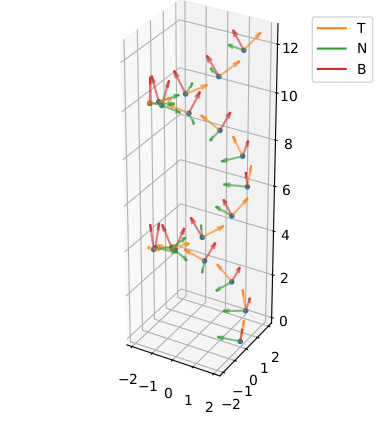

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,(np.pi*4)/4])

ax.plot(*points.T, ls='none', marker='o', ms=3)
for P, n, t, b in zip(points, N, T, B):
    ax.quiver(*P, *t, color="C1", alpha=.6)
    ax.quiver(*P, *n, color="C2", alpha=.6)
    ax.quiver(*P, *b, color="C3", alpha=.6)

ax.legend([plt.Line2D([1], [1], color='C1'),
          plt.Line2D([1], [1], color='C2'),
          plt.Line2D([1], [1], color='C3')], ['T', 'N', 'B'])

display(fig)

The tangent, normal, and binormal unit vectors, often called $\overrightarrow{T}$, $\overrightarrow{N}$, and $\overrightarrow{B}$, or collectively the Frenet–Serret frame or $\text{TNB}$ frame, together form an orthonormal basis spanning $\mathbb{R}$ and are defined as follows:

 * $\overrightarrow{T}$ is the unit vector tangent to the curve, pointing in the direction of motion;
 * $\overrightarrow{N}$ is the normal unit vector, the derivative of $\overrightarrow{T}$ with respect to the arclength parameter of the curve, divided by its length;
 * $\overrightarrow{B}$ is the binormal unit vector, the cross product of $\overrightarrow{T}$ and $\overrightarrow{N} \left( \overrightarrow{T} \times \overrightarrow{N} \right)$.
 
The Frenet-Serret formulas are:

In [5]:
%%latex
\begin{align*}
&\frac{\mathrm{d}T}{\mathrm{d} s} = \kappa N\\
&\frac{\mathrm{d}N}{\mathrm{d} s} = - \kappa T + \tau B\\
&\frac{\mathrm{d}B}{\mathrm{d} s} = - \tau N
\end{align*}

<IPython.core.display.Latex object>

where $d/ds$ is the derivative with respect to arclength, $\kappa$ is the curvature and $\tau$ is the torsion of the curve. The two scalars $\kappa$ and $\tau$ effectively define the curvature and torsion of a space curve. The associated collection, $T$, $N$, $B$, $\kappa$, and $\tau$, is called the Frenet-Serret apparatus. Intuitively, curvature measures the failure of a curve to be a straight line, while torsion measures the failure of a curve to be planar.

# Helix

The geometric parameters defined in  <cite data-cite="kobe_when_2000">(A. V. Kajava et al. 2000)</cite> revolve around the definition of helices. An helix is a type of smooth curve with tangent lines at a constant angle to a fixed axis. An can be thougth as a circle with the coordinate in a 3D dimension constantly increasing. Its Cartesian coordinates are described by the following equations <cite data-cite="weisstein_helix_nodate">(E. W. Weisstein 2020)</cite>:

In [6]:
%%latex
\begin{align*}
&x(t)=\cos{t}\\
&y(t)=\sin{t}\\
&z(t)=c \cdot t
\end{align*}

<IPython.core.display.Latex object>

for $t\in\left[0,2\pi\right)$ where $r$ is the radius of the helix and $2\pi \cdot c$ is a constant giving the vertical separation of the helix's loop, called step (or pitch). Drawing an helix in python requires a straightforward application of this group of equations

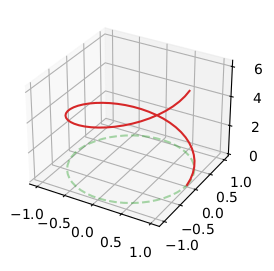

In [7]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111, projection='3d')

# create a range from 0 to 2pi
t = np.linspace(0, np.pi*2) 
# draw a circle on the ground
ax.plot(np.cos(t), np.sin(t), np.full_like(t, 0), 'C2', ls='--', alpha=.4)
# draw the helix allowing the z coordinates to increase
ax.plot(np.cos(t), np.sin(t), t, 'C3')

plt.close()
display(fig)

When $t\in\left[0,2\pi\right)$ we will have a single helix turn, which. Extending on the example in Snippet 1 we can have a better understanding of how the parameters influence the helix. Panel A defines the cartesian frame of reference of the figure. Panel B is constructed as an helix with coordinate $z(t)=0$ (which is equivalent to $c=0$). In Panel C this constraint is released and $z(t)=t$. Panels D, E, F $c$ show the influence of $c$ on the shape of the helix where c is respectively $0.4$, $1$ and $2$.

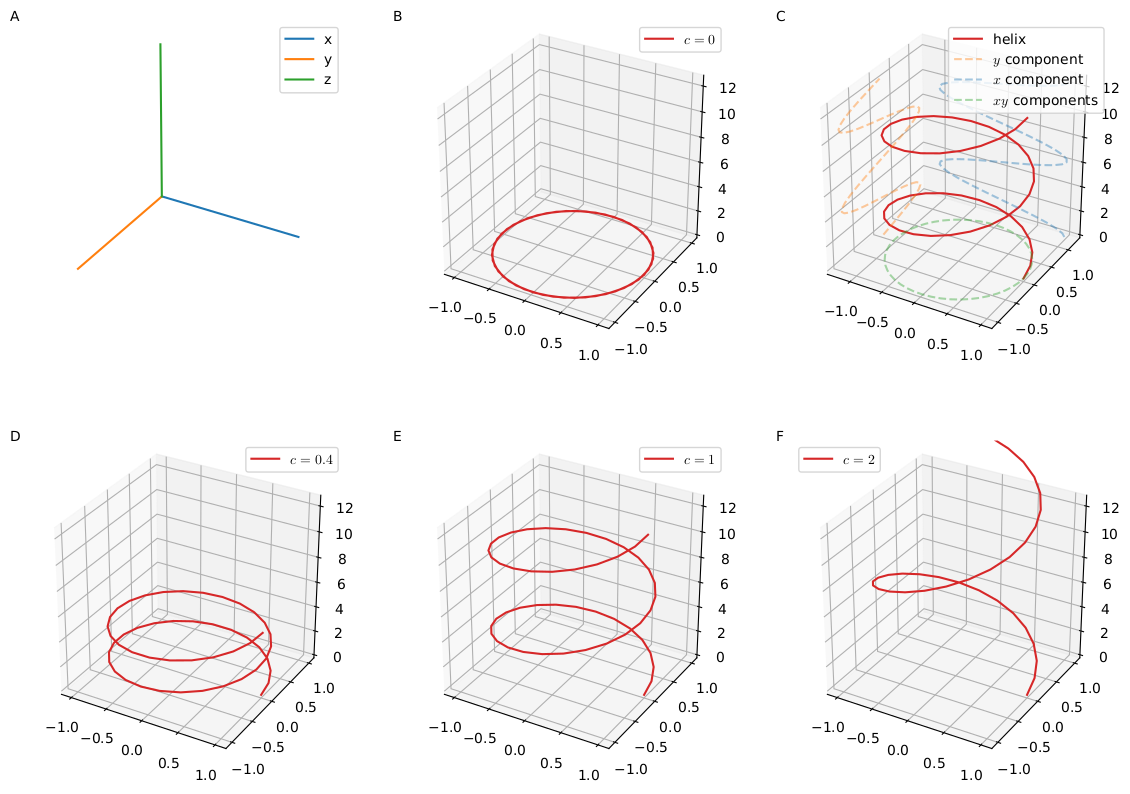

In [8]:
fig = plt.figure(figsize=(14, 10))
axes = [fig.add_subplot(sp, projection='3d') for sp in range(231, 237)]
for ax, label in zip(axes, list(map(chr, range(97, 120)))):
    ax.text2D(-.05, 1, label.upper(), transform=ax.transAxes)
    ax.set_box_aspect([1,1,1])

t = np.linspace(0, np.pi*4)

def cartesian_environment(ax):
    ax.axis('off')
    ax.plot([0, 1], [0, 0], [0, 0], label='x')
    ax.plot([0, 0], [0, -1], [0, 0], label='y')
    ax.plot([0, 0], [0, 0], [0, np.pi*4], label='z')
    
def helix_projections(t, c, ax):
    ax.plot(np.full_like(t, -1.2), np.sin(t), t * c, 'C1', ls='--', label='$y$ component', alpha=.4)
    ax.plot(np.cos(t), np.full_like(t, 1.2), t * c, 'C0', ls='--', label='$x$ component', alpha=.4)
    t1 = np.linspace(0, np.pi*2)
    ax.plot(np.cos(t1), np.sin(t1), np.full_like(t1, 0), 'C2', ls='--', label='$xy$ components', alpha=.4)

cartesian_environment(axes[0])
axes[1].plot(np.cos(t), np.sin(t), t*0, 'C3', label="$c=0$")
axes[2].plot(np.cos(t), np.sin(t), t, 'C3', label='helix')
helix_projections(t, 1, axes[2])

for c, ax in zip([.4, 1, 2], axes[3:]):
    ax.plot(np.cos(t), np.sin(t), t*c, 'C3', label='$c={c}$'.format(c=c))

for ax in axes:
    ax.legend()
    ax.set_zlim(0, np.pi*4)

plt.close()
display(fig)

## Cuvature, Torsion and Arc length of an helix
### Curvature
As described in <cite data-cite="weisstein_helix_nodate">(E. W. Weisstein 2020)</cite>, the curvature of an helix is given by:

$$\kappa=\frac{r}{r^{2}+c^{2}}$$

This means that $$\lim_{c \to 0} \kappa=\frac{1}{r}$$ 

Intuitively, if we were to draw a circle on the plane described by the tangent to the helix in a point and an axis perpendicular to that tangent and the radius, the curvature ($c$) of that circle would be $\frac{1}{r}$. That circle is called the **osculating circle**.

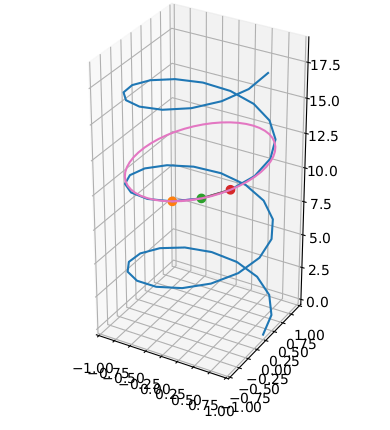

In [9]:
def normal_from_3_points(p0, p1, p2):
    x0, y0, z0 = p0
    x1, y1, z1 = p1
    x2, y2, z2 = p2
    ux, uy, uz = u = [x1-x0, y1-y0, z1-z0]
    vx, vy, vz = v = [x2-x0, y2-y0, z2-z0]
    u_cross_v = [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx]
    origin  = np.array(p0)
    normal = np.array(u_cross_v)
    return origin, normal

def circle_from_point_and_normal(point, normal, R=1, b=1):
    t = np.linspace(0, 2*np.pi)
    d = -point.dot(normal)
    xx = R*np.cos(t)
    yy = R*np.sin(t)
    z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]
    return xx, yy, z

def helix_coord(t):
    return np.cos(t), np.sin(t), t

t = np.linspace(0, np.pi*6)

coords = np.squeeze(np.dstack(helix_coord(t))).round(3)
z1, z2, z3 = coords[29:32]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,2])
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(0, np.pi*6)

ax.plot(*coords.T)
ax.plot(*z1, marker='o')
ax.plot(*z2, marker='o')
ax.plot(*z3, marker='o')

x = np.stack([z2, z1])
y = np.stack([z2, z3])

ax.plot(*x.T)
ax.plot(*y.T)
ax.plot(*circle_from_point_and_normal(*normal_from_3_points(z1, z2, z3)))

plt.close()
display(fig)

### Torsion
The torsion ($\tau$) of an helix is instead given by:

$$\tau=\frac{c}{r^2 + c^2}$$

So that:

$$\frac{\kappa}{\tau}=\frac{r}{c}$$

### Arc length
The arc length (the length of the helix) is given by:

$$s=\sqrt{r^2+c^2}t$$

### Considerations
$\kappa$, $\tau$ and *arc length* are easily calculated in python

In [10]:
def curvature(r, c):
    return r / (r**2 + c**2)

def torsion(r, c):
    return c / (r**2 + c**2)

def arc_length(r, c, t):
    return np.sqrt(r**2 + c**2) * t

The effect on $r$ and $c$ on $\kappa$ and $\tau$ can be seen in the Figure below, which shows an helix drawn with 6 couples of $(r, c)$ values:

$$\begin{bmatrix}
2&2\\
3&2\\
4&2\\
2&2\\
2&3\\
2&4
\end{bmatrix}$$

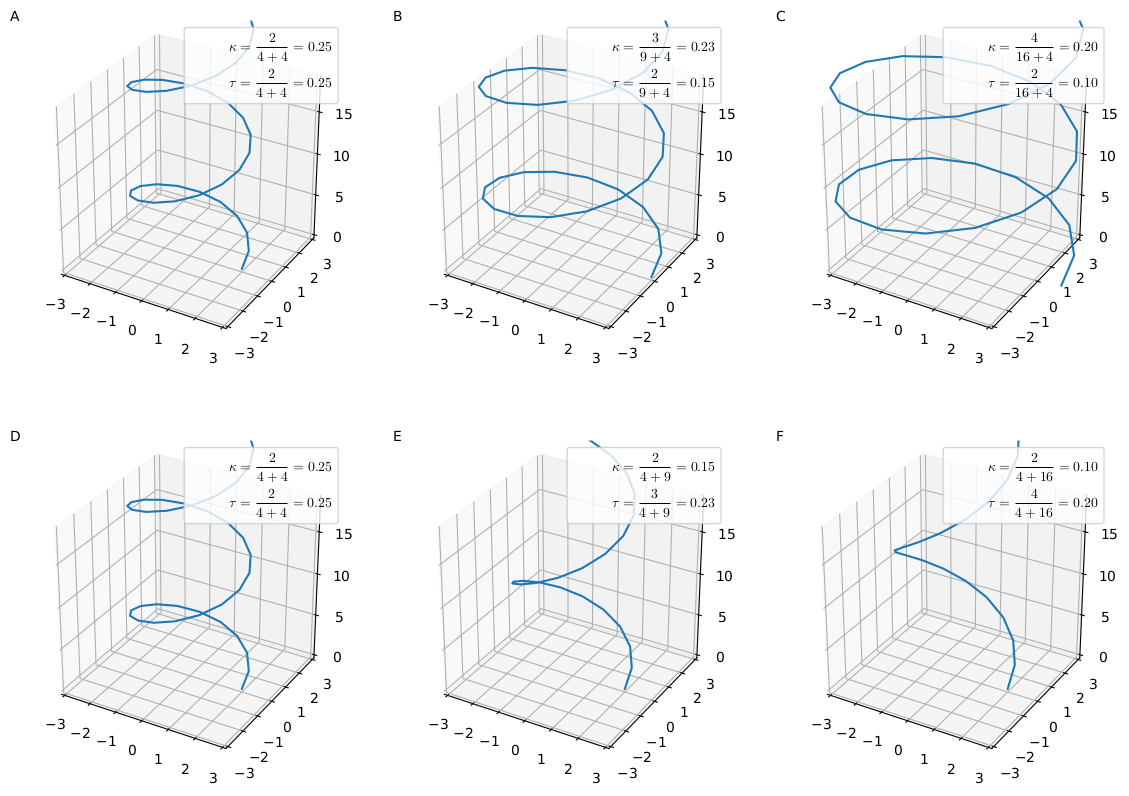

In [11]:
patchless = matplotlib.patches.Rectangle((0,0), 1, 1, fill=False, edgecolor='none',
                                 visible=False)

fig = plt.figure(figsize=(14, 10))
axes = [fig.add_subplot(sp, projection='3d') for sp in range(231, 237)]
for ax, label in zip(axes, list(map(chr, range(97, 120)))):
    ax.text2D(-.05, 1, label.upper(), transform=ax.transAxes)
    ax.set_box_aspect([1,1,1])

t = np.linspace(0, np.pi*6)
for r, c, ax in zip([2, 3, 4, 2, 2, 2], [2, 2, 2, 2, 3, 4], axes):
    ax.plot(r*np.cos(t), r*np.sin(t), t*c)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_zlim(t.min(), t.max())
    labels = ["$\\kappa=\\frac{{{}}}{{{}+{}}}={{{:.2f}}}$".format(r, r**2, c**2, curvature(r, c)),
             "$\\tau=\\frac{{{}}}{{{}+{}}}={{{:.2f}}}$".format(c, r**2, c**2, torsion(r, c))]
    ax.legend([patchless]*2, labels, loc="upper right")

plt.close()
display(fig)

Panels A and D have values of $(2, 2)$. Panels B and C show the effect on $\kappa$ increasing values of $r$ while $c$ is constrained. Panels E and F show the effect on $\kappa$ increasing values of $c$ while $r$ is constrained. 

It can be noticed how when either $r$ or $c$ increases, $\kappa$ decreases. However, it decreases faster at the increase of $c$ than at the increase of $r$, since $r$ is also present at the numerator.



In [12]:
t = np.linspace(0, np.pi*2)
r = np.linspace(1, 10)
c = np.linspace(1, 10)

The effect of $r$ and $c$ on $\kappa$, $\tau$ and *arc length* is easily visualized in the Figure below in panels A, B and C respectively.

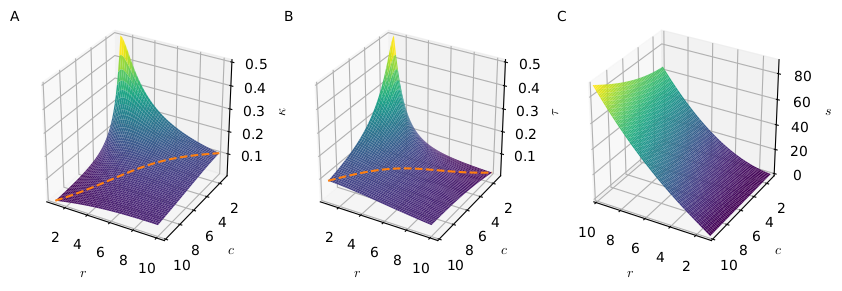

In [13]:
fig = plt.figure(figsize=(10, 4))

axes = [fig.add_subplot(sp, projection='3d') for sp in range(131, 134)]
for ax, label in zip(axes, list(map(chr, range(97, 120)))):
    ax.text2D(-.05, 1, label.upper(), transform=ax.transAxes)
    ax.set_box_aspect([1,1,1])

ax, ax2, ax3 = axes
x, y = np.meshgrid(r, c)

# plot curvature
ax.plot_surface(x, y, curvature(x, y), cmap='viridis')
ax.set_ylim(10, 1)
ax.set_xlabel('$r$')
ax.set_ylabel('$c$')
ax.set_zlabel('$\\kappa$')
ax.plot(r, c[::-1], curvature(r, c[::-1]), zorder=10, ls='--')

# plot torsion
ax2.plot_surface(x, y, torsion(x, y), cmap='viridis')
ax2.set_ylim(10, 1)
ax2.set_xlabel('$r$')
ax2.set_ylabel('$c$')
ax2.set_zlabel('$\\tau$')
ax2.plot(r, c[::-1], torsion(r, c[::-1]), zorder=10, ls='--')

ax3.plot_surface(x, y, arc_length(x, y, t), cmap='viridis')
ax3.set_xlim(10, 1)
ax3.set_ylim(10, 1)
ax3.set_xlabel('$r$')
ax3.set_ylabel('$c$')
ax3.set_zlabel('$s$')

plt.close()
display(fig)

## Super-helix

A super-helix is very similar to a rope, it is an helix that winds around its axis, where its axis is an helix itself. This kind of structure is also been called a *double-twisted helix* <cite data-cite="ugajin_statistical_2001">(Ugajin et al. 2001)</cite>, a *coiled coil* in biology, and a *slinky* in Mathworld <cite data-cite="weisstein_slinky_nodate">(E. Weisstein 2020)</cite>, where are defined a set of parametric equations that describe it:

In [14]:
%%latex
\begin{align*}
&x(t)=[R + r \cdot \cos(\omega t)] \cos(t)\\
&y(t)=[R + r \cdot \cos(\omega t)] \sin(t)\\
&z(t)=ct + r \cdot \sin(\omega t)
\end{align*}

<IPython.core.display.Latex object>

$$
\begin{bmatrix}
R\cos(t)+r\left(\frac{c}{\sqrt{R^2+c^2}} \sin(t) \sin(nt)-\cos(t) \cos(nt) \right) \\
R\sin(t)+r\left(\sin(t) \cos(nt)-\frac{c}{\sqrt{R^2+c^2}} \cos(t) \sin(nt) \right) \\
ct+\frac{R}{\sqrt{R^2+c^2}} r\sin(nt) 
\end{bmatrix}
$$

Where $R$ is the radius of the parent helix and $r$ is the radius of the coiled helix, $c$ is the step (or pitch) of the parent helix and $n$ is the number of coilings per step.

For $t\in\left[0,6\pi\right)$ where $r$ is the radius of the helix and $6\pi \cdot c$ is a constant giving the vertical separation of the helix's loop. Drawing an helix in python requires a straightforward application of this group of equations

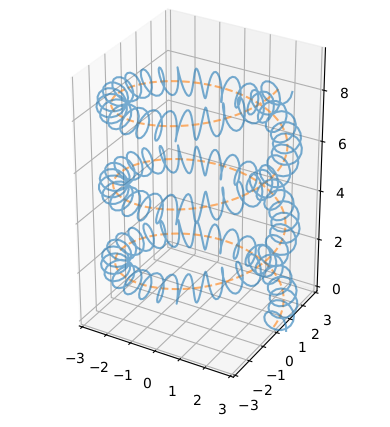

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

R, r, w, c = 3, .5, 30, .5
tmax = 6*np.pi
t = np.linspace(0, tmax, 1500)
x = (R + r * np.cos(w * t)) * np.cos(t)
y = (R + r * np.cos(w * t)) * np.sin(t)
z = (t * c) + (r * np.sin(w * t))
ax.plot(R*np.cos(t), R*np.sin(t), c*t, alpha=.6, ls='--', c='C1')
ax.plot(x, y, z, alpha=.6, c='C0')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(0, c*tmax)
ax.set_box_aspect([1,1,(c*tmax)/6])

plt.close()
display(fig)

The effects of $r$ and $\omega$ on the super-helix are shown in the Figure below.

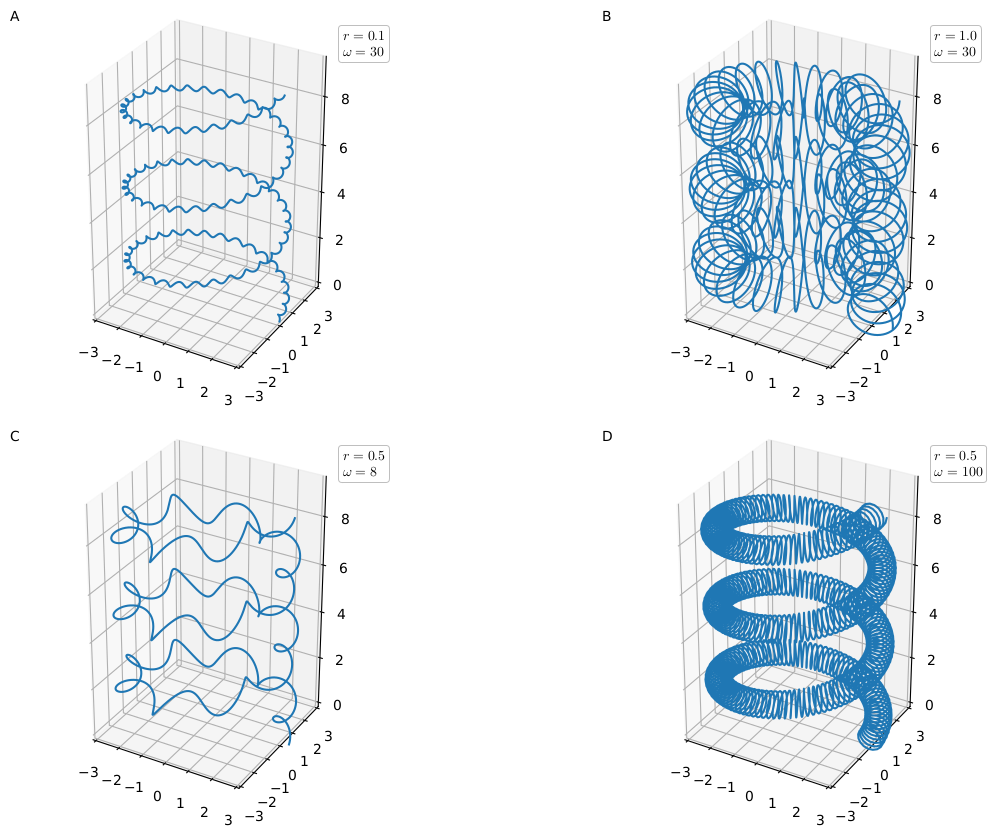

In [50]:
patchless = matplotlib.patches.Rectangle((0,0), 1, 1, fill=False, edgecolor='none',
                                 visible=False)

c = .5
props = dict(boxstyle='round', facecolor='white', alpha=0.5, linewidth=.5, edgecolor='grey')
fig = plt.figure(figsize=(14, 10))
axes = [fig.add_subplot(sp, projection='3d') for sp in range(221, 225)]
for ax, label in zip(axes, list(map(chr, range(97, 120)))):
    ax.text2D(-.05, 1, label.upper(), transform=ax.transAxes)
    ax.set_box_aspect([1,1, (np.pi*6*c) / 6])

t = np.linspace(0, np.pi*6, 5000)
for r, w, ax in zip([.1, 1, .5, .5], [30, 30, 8, 100], axes):
    x = (R + r * np.cos(w * t)) * np.cos(t)
    y = (R + r * np.cos(w * t)) * np.sin(t)
    z = (t * c) + (r * np.sin(w * t))
    ax.plot(x, y, z)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_zlim(0, c*np.pi*6)
    labels = ["$r={{{:.1f}}}$".format(r), "$\\omega={{{}}}$".format(w)]
    ax.text2D(.9, .9, '\n'.join(labels), transform=ax.transAxes, bbox=props)

plt.close()
display(fig)

## Twist 
If defined as in <cite data-cite="kobe_when_2000">(A. V. Kajava et al. 2000)</cite>, twist is a very simple property. It's simply the angle dihedral angle ($\psi$) between analogous points ($A, B$) in two successive coils of an helix.

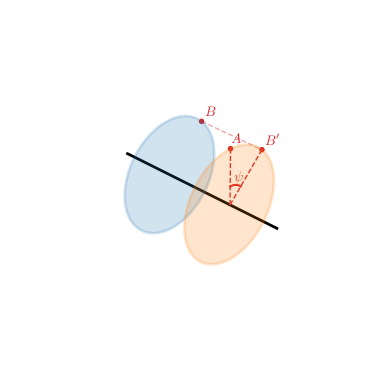

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])

def circle(x, y, z, r, c, ax):
    p = matplotlib.patches.Circle((x, y), r, alpha=0.2, edgecolor=c, facecolor=c, lw=2)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=z, zdir="x")
    
def points(x, y, z, mfc, mec, s, ax):
    ax.plot(x, y, z, linestyle='none', marker='o', mfc=mfc, mec=mec, markersize=s)

n = 1000
theta_max = 8 * np.pi
theta = np.linspace(0, theta_max, n)
x = theta
z =  np.sin(theta)
y =  np.cos(theta)

t_1 = np.linspace(0, np.pi * 2, 100)
ax.plot((-5, 5), (0,0), (0,0), color='k', lw=2)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
ax.set_axis_off()

r = 3
x1, x2, = -2, 2
circle(0, 0, x1, r, 'C0', ax)
circle(0, 0, x2, r, 'C1', ax)
psi = np.pi*.25
psi_y = r*np.sin(psi)
psi_z = r*np.cos(psi)
points(x1, psi_y, psi_z, 'C3', 'C3', r, ax)
points(x2, 0, r, 'C3', 'C3', r, ax)
points(x2, psi_y, psi_z, 'C3', 'w', 5, ax)
projection = ax.plot([x1, x2], [psi_y]*2, [psi_z]*2, linestyle='--', lw=1, alpha=.4)
ax.plot([x2, x2], [0, psi_y], [0, psi_z], c='C3', ls='--', lw=1)
ax.plot([x2, x2], [0, 0], [0, r], c='C3', ls='--', lw=1)
ax.plot([2]*30, np.sin(np.linspace(0, psi, 30)), np.cos(np.linspace(0, psi, 30)), c='C3')
ax.text(x2, 0.25, 1.2, "$\psi$", color='C3')
ax.text(x2, 0, r+r/10, "$A$", color='C3')
ax.text(x1, psi_y + .2, psi_z + .2, "$B$", color='C3')
ax.text(x2, psi_y + .2, psi_z + .2, "$B'$", color='C3')
ax.view_init(elev=30, azim=-45)

display(fig)

When two intersection planes are described in terms of Cartesian coordinates by the two equations

In [53]:
%%latex
\begin{align*}
&a_1x + b_1y+c_1z=0\\
&a_2x + b_2y+c_2z=0
\end{align*}

<IPython.core.display.Latex object>

The dihedral angle ($\psi$) between them is given by:

$$
\cos(\psi) =\frac{|a_1a_2+b_1b_2+c_1c_2|}{\sqrt{a_{1}^{2}+b_{1}^{2}+c_{1}^{2}}\sqrt{a_{2}^{2}+b_{2}^{2}+c_{2}^{2}}}
$$

* ribbons (closed and simple) https://en.wikipedia.org/wiki/Ribbon_(mathematics)
* twist 
* writhing (https://www.pnas.org/content/pnas/68/4/815.full.pdf)